In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
%load_ext autoreload
%autoreload 2

In [13]:
dataset = "mnist"
#dataset = "cifar10"
nn_type = "cnn"
#nn_type = "mlp"

In [14]:
cfg_filename = f"configs/{nn_type}/config-{dataset}.json"

with open(cfg_filename) as cfg_file:
    cfg = json.load(cfg_file)

In [15]:
cfg["RGRAPH"]["SAVE_GRAPH"] = True

In [16]:
param_grid = {
    "sparsities" : [0.5], 
    "rewiring_probabilities" : [0.128],
    "random_seeds" : [4]
}

In [17]:
from src import explore

In [18]:
explore.run_on_param_grid(cfg, param_grid, log = True)

Train
loss : 0.9767532833476564
top1_err : 28.530339366083208
top5_err : 4.829091151385928
---

Test
top1_err : 6.9323575949367084
top5_err : 0.524129746835443
---

Train
loss : 0.223233345316163
top1_err : 5.232764739217535
top5_err : 0.2820717754648693
---

Test
top1_err : 3.7974683544303796
top5_err : 0.16811708860759494
---

Train
loss : 0.12904890844308492
top1_err : 3.1316631130063968
top5_err : 0.1382595948827292
---

Test
top1_err : 5.13251582278481
top5_err : 0.2076740506329114
---

Train
loss : 0.09810979365667047
top1_err : 2.440920389537364
top5_err : 0.08995202558635394
---

Test
top1_err : 2.412974683544304
top5_err : 0.09889240506329114
---

Train
loss : 0.08102838294719582
top1_err : 2.0044864876183874
top5_err : 0.059968017057569295
---

Test
top1_err : 2.7590981012658227
top5_err : 0.07911392405063292
---

Train
loss : 0.07031325389867399
top1_err : 1.717972628343334
top5_err : 0.04386548548619122
---

Test
top1_err : 2.274525316455696
top5_err : 0.04944620253164557
-

In [19]:
from utils import graph_utils

In [20]:
for sparsity in param_grid["sparsities"]:
    for p in param_grid["rewiring_probabilities"]:
        for seed in param_grid["random_seeds"]:
            out_dir = f"{cfg['OUT_DIR']}/{cfg['MODEL']['TYPE']}/{cfg['TRAIN']['DATASET']}/graphs"
            graph = graph_utils.load_graph(f"{out_dir}/gsparsity={sparsity}_p={p}_gseed={seed}.npz")
            print(graph_utils.get_graph_stats(graph))

{'clustering_coefficient': 0.5921365568117932, 'average_path_length': 1.492063492063492}


In [21]:
from utils import log_parser

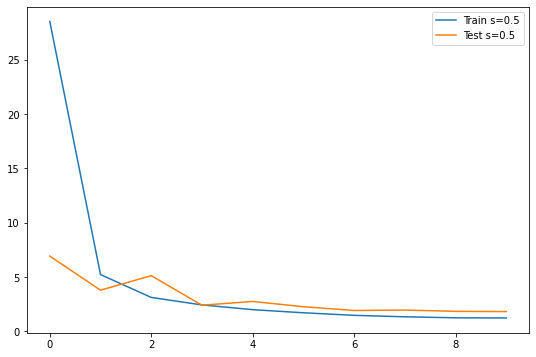

In [22]:

plt.figure(figsize = (9, 6))

for sparsity in param_grid["sparsities"]:
    for p in param_grid["rewiring_probabilities"]:
        for seed in param_grid["random_seeds"]:
            out_dir = f"{cfg['OUT_DIR']}/{cfg['MODEL']['TYPE']}/{cfg['TRAIN']['DATASET']}/logs"
            train_stats, test_stats = log_parser.parse_log(f"{out_dir}/log_gsparsity={sparsity}_p={p}_gseed={seed}.txt")
            
            plt.plot(train_stats[:, 1], label = f"Train s={sparsity}")
            plt.plot(test_stats[:, 0], label = f"Test s={sparsity}")
            
plt.legend()